In [3]:
#importing some important libraries:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from glob import glob
from skimage import io
from shutil import copy

from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Input
from keras.preprocessing.image import load_img, img_to_array

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# path = glob('/content/drive/MyDrive/mydata/*.xml')
path = glob('/content/drive/MyDrive/8thsemProj/data/*.xml')

In [5]:
labels_dict = dict(filepath=[],xmin=[],xmax=[],ymin=[],ymax=[])
for filename in path:
  info = xet.parse(filename)
  root = info.getroot()
  member_object = root.find('object')
  #Collecting important data from xml files:
  labels_info = member_object.find('bndbox')
  xmin = int(labels_info.find('xmin').text)
  xmax = int(labels_info.find('xmax').text)
  ymin = int(labels_info.find('ymin').text)
  ymax = int(labels_info.find('ymax').text)
  #Storing data into dictionary:
  labels_dict['filepath'].append(filename)
  labels_dict['xmin'].append(xmin)
  labels_dict['xmax'].append(xmax)
  labels_dict['ymin'].append(ymin)
  labels_dict['ymax'].append(ymax)

In [67]:
mydata = pd.DataFrame(labels_dict)
mydata.to_csv('mycsv.csv',index=False)
mydata.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/8thsemProj/data/Cars100...,175,214,114,131
1,/content/drive/MyDrive/8thsemProj/data/Cars107...,141,311,113,164
2,/content/drive/MyDrive/8thsemProj/data/Cars109...,115,278,116,153
3,/content/drive/MyDrive/8thsemProj/data/Cars0.xml,226,419,125,173
4,/content/drive/MyDrive/8thsemProj/data/Cars113...,151,306,113,180


In [68]:
filename = mydata['filepath'][0]
def getFilename(filename):
    image_name = xet.parse(filename).getroot().find('filename').text
    # image_path = os.path.join('/content/drive/MyDrive/mydata',image_name)
    image_path = os.path.join('/content/drive/MyDrive/8thsemProj/data', image_name)
    return image_path
getFilename(filename)

'/content/drive/MyDrive/8thsemProj/data/Cars100.png'

In [69]:
import random
rand_num=random.randint(0,len(mydata['filepath']))
rand_num

371

In [70]:
file_path=list(mydata['filepath'])
file_path[:5]

['/content/drive/MyDrive/8thsemProj/data/Cars100.xml',
 '/content/drive/MyDrive/8thsemProj/data/Cars107.xml',
 '/content/drive/MyDrive/8thsemProj/data/Cars109.xml',
 '/content/drive/MyDrive/8thsemProj/data/Cars0.xml',
 '/content/drive/MyDrive/8thsemProj/data/Cars113.xml']

In [71]:
#Checking whether there is any null value in dataset or not:
col_null=[x for x in mydata.columns if mydata[x].isnull().sum()>0]
col_null

[]


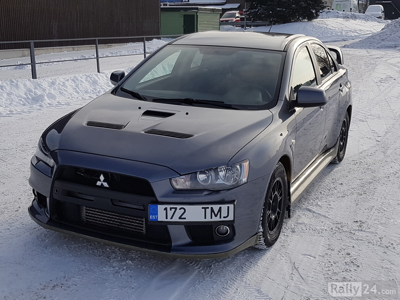

In [72]:
image_path = file_path[rand_num] #path of our random image.
#image_path
filt=mydata["filepath"]==image_path
obj=getFilename(image_path)
img = cv2.imread(obj) #read the image
xmin=mydata[filt]['xmin']
xmax=mydata[filt]['xmax']
ymin=mydata[filt]['ymin']
ymax=mydata[filt]['ymax']
img = io.imread(obj) #Read the image
fig = px.imshow(img)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Vehicle with bounding box')
fig.add_shape(type='rect',x0=int(xmin), x1=int(xmax), y0=int(ymin), y1=int(ymax), xref='x', yref='y',line_color='cyan')


In [73]:
dataset=pd.read_csv('mycsv.csv')
dataset.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/8thsemProj/data/Cars100...,175,214,114,131
1,/content/drive/MyDrive/8thsemProj/data/Cars107...,141,311,113,164
2,/content/drive/MyDrive/8thsemProj/data/Cars109...,115,278,116,153
3,/content/drive/MyDrive/8thsemProj/data/Cars0.xml,226,419,125,173
4,/content/drive/MyDrive/8thsemProj/data/Cars113...,151,306,113,180


In [74]:
dataset['filepath']=dataset['filepath'].str.replace('xml','png')

In [75]:
mydata.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/8thsemProj/data/Cars100...,175,214,114,131
1,/content/drive/MyDrive/8thsemProj/data/Cars107...,141,311,113,164
2,/content/drive/MyDrive/8thsemProj/data/Cars109...,115,278,116,153
3,/content/drive/MyDrive/8thsemProj/data/Cars0.xml,226,419,125,173
4,/content/drive/MyDrive/8thsemProj/data/Cars113...,151,306,113,180


In [76]:
dataset.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/8thsemProj/data/Cars100...,175,214,114,131
1,/content/drive/MyDrive/8thsemProj/data/Cars107...,141,311,113,164
2,/content/drive/MyDrive/8thsemProj/data/Cars109...,115,278,116,153
3,/content/drive/MyDrive/8thsemProj/data/Cars0.png,226,419,125,173
4,/content/drive/MyDrive/8thsemProj/data/Cars113...,151,306,113,180


In [77]:
dataset.to_csv('mycsv1.csv',index=False)

In [78]:
dataset=pd.read_csv('mycsv1.csv')

In [79]:
dataset.head()

,filepath,xmin,xmax,ymin,ymax
0,/content/drive/MyDrive/8thsemProj/data/Cars100...,175,214,114,131
1,/content/drive/MyDrive/8thsemProj/data/Cars107...,141,311,113,164
2,/content/drive/MyDrive/8thsemProj/data/Cars109...,115,278,116,153
3,/content/drive/MyDrive/8thsemProj/data/Cars0.png,226,419,125,173
4,/content/drive/MyDrive/8thsemProj/data/Cars113...,151,306,113,180


In [80]:
image_path = list(dataset['filepath'])

In [81]:
#Targeting all our values in array selecting all columns
labels = dataset.iloc[:,1:].values
data = []
output = []
for i in range(len(image_path)):
    image = image_path[i]
    img_arr = cv2.imread(image)
    h,w,d = img_arr.shape
    # Prepprocesing
    load_image = load_img(image,target_size=(224,224))
    load_image_arr = img_to_array(load_image)
    norm_load_image_arr = load_image_arr/255.0 # Normalization
    # Normalization to labels
    xmin,xmax,ymin,ymax = labels[i]
    nxmin,nxmax = xmin/w,xmax/w
    nymin,nymax = ymin/h,ymax/h
    label_norm = (nxmin,nxmax,nymin,nymax) # Normalized output
    # Append
    data.append(norm_load_image_arr)
    output.append(label_norm)


In [82]:
# Convert data to array
X = np.array(data,dtype=np.float32)
y = np.array(output,dtype=np.float32)

In [83]:
# Split the data into training and testing set using sklearn.
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((346, 224, 224, 3), (87, 224, 224, 3), (346, 4), (87, 4))

In [84]:
# X_train_flattened = x_train.reshape(len(x_train), 28*28)
# X_test_flattened = x_test.reshape(len(x_test), 28*28)

In [85]:
#Building CNN model:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [86]:
from tensorflow.keras.applications import InceptionResNetV2,ResNet152

In [87]:
from tensorflow.keras.models import Model


In [88]:
inception_resnet = InceptionResNetV2(weights="imagenet",include_top=False, input_tensor=Input(shape=(224,224,3)))
# ---------------------
headmodel = inception_resnet.output
headmodel = Flatten()(headmodel)
headmodel = Dense(500,activation="relu")(headmodel)
headmodel = Dense(250,activation="relu")(headmodel)
headmodel = Dense(4,activation='sigmoid')(headmodel)

# ---------- model
model = Model(inputs=inception_resnet.input,outputs=headmodel)


In [89]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                                           

In [90]:
#Compiling model:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [91]:
import tensorflow as tf
es=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

In [92]:
his = model.fit(x_train, y_train, epochs=50,callbacks=es,
                batch_size=10,
                    validation_data=(x_test, y_test))

Epoch 1/50
35/35 [==============================] - 34s 344ms/step - loss: 1.2900 - accuracy: 0.4133 - val_loss: 1.1024 - val_accuracy: 0.4828
Epoch 2/50
35/35 [==============================] - 9s 269ms/step - loss: 0.6988 - accuracy: 0.6069 - val_loss: 89.6368 - val_accuracy: 0.4138
Epoch 3/50
35/35 [==============================] - 9s 255ms/step - loss: 0.6604 - accuracy: 0.6734 - val_loss: 6.1915 - val_accuracy: 0.6552
Epoch 4/50
35/35 [==============================] - 9s 260ms/step - loss: 0.7209 - accuracy: 0.7775 - val_loss: 197.6176 - val_accuracy: 0.3333
Epoch 5/50
35/35 [==============================] - 9s 263ms/step - loss: 0.6488 - accuracy: 0.7803 - val_loss: 52.2312 - val_accuracy: 0.5057
Epoch 6/50
35/35 [==============================] - 9s 263ms/step - loss: 0.6270 - accuracy: 0.8035 - val_loss: 5.4246 - val_accuracy: 0.5517
Epoch 7/50
35/35 [==============================] - 9s 265ms/step - loss: 0.6251 - accuracy: 0.7775 - val_loss: 0.9521 - val_accuracy: 0.5977
E

3/3 - 1s - loss: 0.6114 - accuracy: 0.8621 - 577ms/epoch - 192ms/step


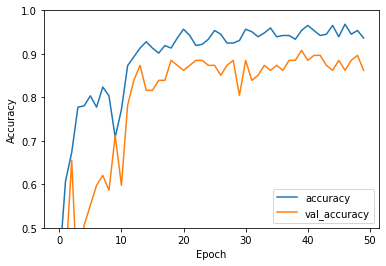

In [93]:
plt.plot(his.history['accuracy'], label='accuracy')
plt.plot(his.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [94]:
print(test_acc)

0.8620689511299133


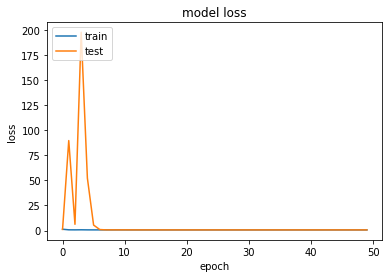

In [95]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
!mkdir -p saved_model

In [97]:
# model.save('/content/drive/MyDrive/8thsemProj/Automatic-License-Plate-Detection-khom/abc122')
model.save('saved_model/abc122')

In [6]:
# new_model = tf.keras.models.load_model('saved_model/abc122')
new_model = tf.keras.models.load_model('/content/drive/MyDrive/8thsemProj/Automatic-License-Plate-Detection-khom/abc122')

# Check its architecture
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_203 (Conv2D)            (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_203 (Batch  (None, 111, 111, 32  96         ['conv2d_203[0][0]']             
 Normalization)                 )                                                           

In [60]:
# path = '/content/drive/MyDrive/8thsemProj/Automatic-License-Plate-Detection-khom/TEST/test3.png'
# path = '/content/drive/MyDrive/8thsemProj/Automatic-License-Plate-Detection-khom/TEST/vehicle-test.png'
path = '/content/drive/MyDrive/8thsemProj/Automatic-License-Plate-Detection-khom/TEST/Cars80.png'
# path = '/content/drive/MyDrive/8thsemProj/Automatic-License-Plate-Detection-khom/TEST/N1.png'
image = load_img(path) # PIL object
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255)
image1 = load_img(path,target_size=(224,224))
image_arr_224 = img_to_array(image1)/255.0  # Convert into array and get the normalized output

# Size of the orginal image
h,w,d = image.shape
print('Height of the image =',h)
print('Width of the image =',w)


Height of the image = 295
Width of the image = 400



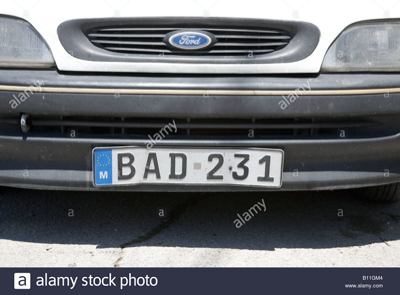

In [62]:
fig = px.imshow(image)
fig.update_layout(width=600, height=500,  margin=dict(l=10, r=10, b=10, t=10), xaxis_title='TEST Image')

In [63]:
image_arr_224.shape

(224, 224, 3)

In [64]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape


(1, 224, 224, 3)

In [65]:
# Make predictions
coords =new_model.predict(test_arr)
coords

array([[0.2352097 , 0.70769095, 0.491477  , 0.65159315]], dtype=float32)

In [66]:
# Denormalize the values
denorm = np.array([w,w,h,h])
coords = coords * denorm
coords

array([[ 94.08388138, 283.07638168, 144.98571873, 192.21997887]])

In [67]:
coords = coords.astype(np.int32)
coords

array([[ 94, 283, 144, 192]], dtype=int32)

In [68]:
# Draw bounding on top the image
xmin, xmax,ymin,ymax = coords[0]
# pt1 =(xmin,ymin)
# pt2 =(xmax,ymax)
# print(pt1, pt2)

In [69]:
# cv2.rectangle(image,pt1,pt2,(0,255,0),3)
# fig = px.imshow(image)
# fig.update_layout(width=700, height=500, margin=dict(l=10, r=10, b=10, t=10))


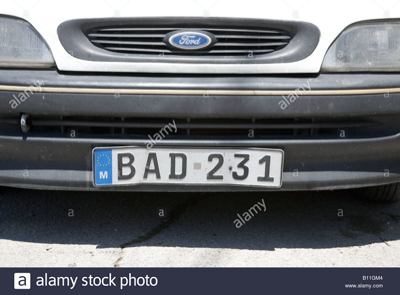

In [70]:

fig = px.imshow(image)
fig.update_layout(width=600, height=500, margin=dict(l=10, r=10, b=10, t=10))
fig.add_shape(type='rect',x0=int(xmin), x1=int(xmax), y0=int(ymin), y1=int(ymax), xref='x', yref='y',line_color='red')


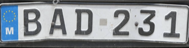

In [71]:
img = np.array(load_img(path))
xmin ,xmax,ymin,ymax = coords[0]
roi = img[ymin:ymax,xmin:xmax]
fig = px.imshow(roi) 
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Figure 15 Cropped image')

Plate Character Segmentation Using OpenCV

In [72]:
#Convert Image into grayScale and Blur:
plate_image = cv2.convertScaleAbs(roi, alpha=(255.0))
gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(7,7),0)
fig = px.imshow(gray)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Gray')

In [73]:
fig = px.imshow(blur)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='Blur')

In [74]:
 # Applied inversed thresh_binary 
binary=cv2.threshold(blur, 180, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
fig = px.imshow(binary) 
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='binary')

In [75]:
## Applied dilation 
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
thre_mor = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
# thre_mor1 = cv2.morphologyEx(binary, cv2.MORPH_ERODE, thre_mor)


fig = px.imshow(thre_mor)
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='binary')

Determine the contours of License Characters

Detect 6 letters...



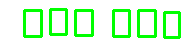

In [76]:
# Create sort_contours() function to grab the contour of each digit from left to right
def sort_contours(cnts,reverse = False):
    i = 0
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
                                        key=lambda b: b[1][i], reverse=reverse))
    return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# creat a copy version "test_roi" of plat_image to draw bounding box
test_roi = plate_image.copy()

# Initialize a list which will be used to append charater image
crop_characters = []

# define standard width and height of character
digit_w, digit_h = 30, 60

for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)

            # Sperate number and gibe prediction
            curr_num = thre_mor[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)
            
print("Detect {} letters...".format(len(crop_characters)))   
  
fig = px.imshow(test_roi) 
fig.update_layout(width=350, height=250, margin=dict(l=10, r=10, b=10, t=10),xaxis_title='bounding_box')

In [82]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)


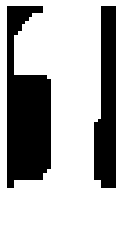

In [88]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)


fig.add_subplot(grid[0])
plt.axis(False)
plt.imshow(crop_characters[i],cmap="gray")

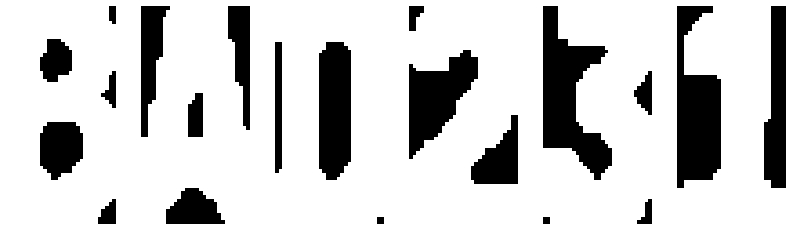

In [89]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(14,4))
grid = gridspec.GridSpec(ncols=len(crop_characters),nrows=1,figure=fig)

for i in range(len(crop_characters)):
  fig.add_subplot(grid[i])
  plt.axis(False)
  plt.imshow(crop_characters[i],cmap="gray")